In [1]:
from tars import Tars, markets, portfolios, traders, strategies
%matplotlib inline

Importing plotly failed. Interactive plots will not work.


# Getting Started

Welcome on Tars, the coolest crypto trading bot for research purposes. Here's a great first guide to follow to get accustomed with the different module available in Tars.

We'll get familiar with :

    1. Tars' concepts
    2. the way to make the bot trade 24/7
    3. the tutorials


Have a good read!

---

## Concept

The goal of Tars is to allow developers to create trading strategies with ease. The concept is composed of the following building blocks : 

- market
- portfolio
- trader
- strategy

The idea behind this decomposition is to follow the nature of the trading activity. A **strategy** is used by a **trader** to manage a **portfolio** on a **market**.

When it makes sense, each object has a test version and a real version. So that it's possible to trade without financial risk.

Once you have those four components, you can give them to **Tars** so that he can run them.

### Market object

Allows to get the latest data from the market. Currently, only the cryptocurrency market is available. To get the latest OHLC data for ETHUSD : 

In [2]:
markets.CryptoMarket().get_ohlc_data('XETHZUSD')[0].tail()

,time,open,high,low,close,vwap,volume,count
dtime,,,,,,,,
2021-09-15 15:31:00,1631719860,3484.22,3498.13,3484.22,3497.19,3489.69,223.929291,103
2021-09-15 15:30:00,1631719800,3483.89,3485.17,3481.12,3484.21,3483.12,50.739923,25
2021-09-15 15:29:00,1631719740,3482.59,3484.07,3482.59,3483.35,3482.95,4.807671,7
2021-09-15 15:28:00,1631719680,3480.18,3480.68,3480.18,3480.68,3480.25,12.785327,17
2021-09-15 15:27:00,1631719620,3478.80,3481.71,3478.79,3480.12,3480.64,3.790237,9


### Portfolio object

Represents the portfolio of currencies available for trading. Two objects are at your disposal : 

    - VirtualPortfolio -> for testing purposed
    - CryptoPortfolio -> your real Kraken Exchange portfolio


In [3]:
# Create a virtual portfolio
portfolio = portfolios.VirtualPortfolio(
    {'ZUSD': 1000,
     'XETH': 30}
)

In [4]:
# Get the account balance
portfolio.get_account_balance()

,vol
ZUSD,1000
XETH,30


In [5]:
# Get the total available amount for trading
portfolio.get_trade_balance()

,ZUSD
eb,107057.2


### Trader object

Trader is the object allowing to make orders, cancel them, etc. To create a cryptocurrency trader, you also have two objects: 

    - VirtualCryptoTrader -> for paper trading 
    - CryptoTrader -> connects to Kraken Exchange for real transactions
    

In [6]:
# Create the virtual cryptocurrency trader
trader = traders.VirtualCryptoTrader(portfolio)

In [7]:
# Add an order. Here, buy some ETH 
trader.add_order(
    pair='XETHZUSD', 
    type='buy',
    ordertype='market', 
    volume=0.2,
    validate=True)

VirtualOrder(dtime=Timestamp('2021-09-16 03:26:41.986200+0000', tz='UTC'), pair='XETHZUSD', ordertype='buy', type='market', price=3535.24, cost=707.048, fee=1.8383247999999999, volume=0.2)

In [8]:
# You can trace back the actions of a trader to see what he did
trader.get_trades_history()[0]

,ordertxid,pair,ordertype,type,price,cost,fee,volume
dtime,,,,,,,,
2021-09-16 03:26:41.986200+00:00,e2968d68,XETHZUSD,buy,market,3535.24,707.048,1.838325,0.2


### Strategy object

This is the most interesting, this package allows you to choose different ways to trade. Among them: 

    - BuyAndHold
    - RandomInvestment
    - SequentialInvestment
    - TrendFollowingMACD
    - and more...

For instance, to create the simplest `BuyAndHold` strategy, just do : 

In [9]:
strategy = strategies.BuyAndHold(
    trader, 
    'XETHZUSD', 
    0.2)

And don't forget to call for help when you're unsure about the signature needed for a strategy, they are sometimes different.

In [10]:
help(strategies.BuyAndHold)

Help on class BuyAndHold in module tars.strategies.buy_and_hold_strategy:

class BuyAndHold(tars.strategies.abstract_strategy.AbstractStrategy)
 |  BuyAndHold(trader, pair, volume, validate=True)
 |  
 |  The buy and hold strategy is the reference strategy needed in all
 |  scenario of comparison as it allows for setting the baseline.
 |  
 |  :param trader: Trader
 |      The Trader handling a portfolio
 |  :param pair: str
 |      The pair e.g. XETHZUSD to buy and hold
 |  :param volume: float
 |      The volume of the pair's quote buy
 |  :param validate: boolean
 |      Safety Boolean to make sure not to trade real money by default
 |  
 |  :ivar has_run: boolean
 |      Boolean describing if the strategy has run or not yet.
 |  :ivar evaluator: AbstractEvaluator
 |      Evaluator allows for the evaluation of a strategy
 |  
 |  Method resolution order:
 |      BuyAndHold
 |      tars.strategies.abstract_strategy.AbstractStrategy
 |      abc.ABC
 |      builtins.object
 |  
 |  Met

#### Create your own strategy

It's super simple to create your own new strategy and I encourage you 
to give it a shot! 

To do it, you just need to inherit from 
the `AbstractStrategy`and implement a `run` function without parameters. You can check the different existing strategies to see how to do it if you have a doubt.

---

## Run a strategy with Tars

In [12]:
tars = Tars()
tars.load(strategy)

 🤖 TARS : Welcome to Endurance! 👨‍🚀
 🤖 TARS : Loaded strategy ➡️ Buy and hold


### Start the bot

In [13]:
tars.start('00:01:00')

 🤖 TARS : Starting trading session 📈
 ⏱ Trading decision will be taken every : 00:01:00️ (hh:mm:ss)
 💪️ Loading :   
   🧵 'Thread-8' ➡️ 'Buy and hold'


### Evaluate the strategy

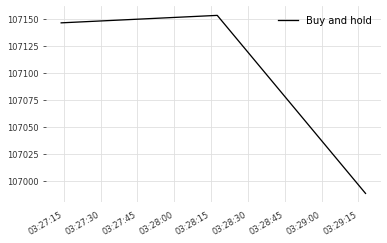

In [26]:
tars.plot()

In [25]:
tars.evaluate()

,Buy and hold
2021-09-16 03:27:00+00:00,107146.56
2021-09-16 03:28:00+00:00,107153.51
2021-09-16 03:29:00+00:00,106988.01


### Stop the bot

In [27]:
tars.stop()

 🤖 TARS : ✋ Stopped all strategies


### Trade with real money

To do that, just change the portfolio and trader objects as follow:
    
    - VirtualPortfolio should become CryptoPortfolio
    - VirtualCryptoTrader should become CryptoTrader
    
Update the boolean `validating` trader arguments to `False`, run Tars and let him do his job!

---

## What else?

Some tutorials are available in the `notebooks/tutorials`folder. So far:

    - One about historical data loading
    - Trading for real
    - Trading virtually
    

### Any Questions?

If you have any questions, feel free to contact me or put an issue on GitHub.

---